# Problem Statement:

1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
data = pd.read_csv('delivery_time.csv')

In [3]:
# backup original data
df = data.copy()

# Data Exploration

In [4]:
df.head()

Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [6]:
df.describe()

Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000

# Data Preprocessing

### Identifying Duplicates

In [7]:
duplicated_rows = df[df.duplicated()]

print(duplicated_rows)

Empty DataFrame
Columns: [Delivery Time, Sorting Time]
Index: []


In [8]:
# There is no duplicate values present in dataset.

### Identifying Missing Values

In [9]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
# There is no missing values in dataset

### Identifying Outliers

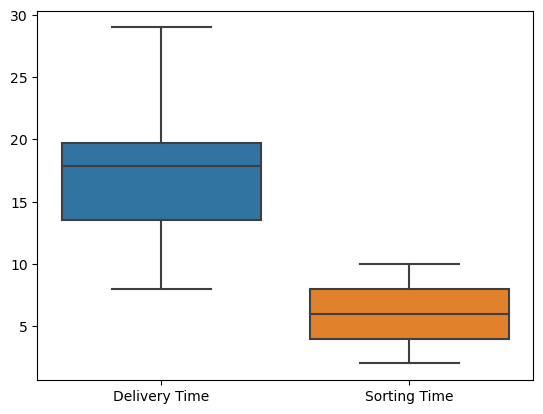

In [11]:
sns.boxplot(data=df);

- With above boxplot we can see there is no outlier present in dataset.

# Data Visualization

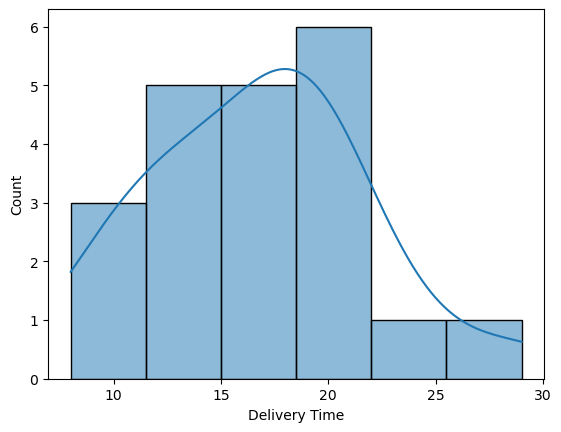

In [12]:
sns.histplot(df['Delivery Time'],kde=True)
plt.show()

- The most common delivery time appears to be between 15 and 20.
- There are also a significant number of deliveries that take between 10 and 15 days and between 20 and 25 days.
- Fewer deliveries take less than 10 days or more than 25 days.

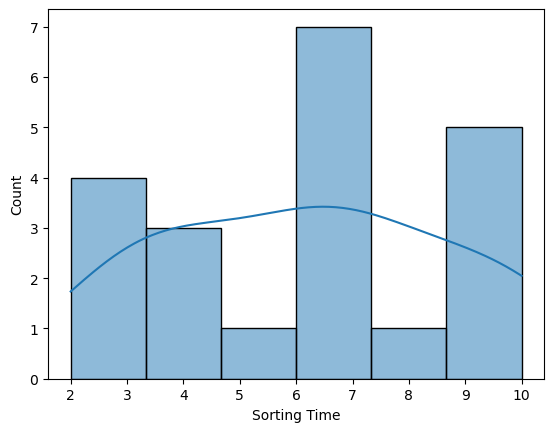

In [13]:
sns.histplot(df['Sorting Time'], kde=True)
plt.show()

- The most common sorting time appears to be between 4 and 6.
- There are also a significant number of sortings that take between 2 and 4 and between 6 and 8.
- Fewer sortings take less than 2 or more than 8.

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


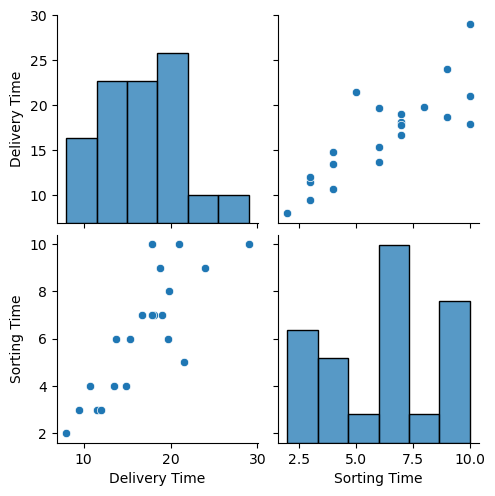

In [14]:
sns.pairplot(df);

- The data points are scattered throughout the plot, with no clear linear relationship between the two variables.
- There are some outliers, which are data points that fall far away from the cluster of data points.
- These outliers could be due to factors such as the distance the package needs to travel, the weather, or other factors that are not included in the data set.
- The scales of the two axes are different. The sorting time axis (x-axis) ranges from 2 to 10, while the delivery time axis (y-axis) ranges from 10 to 30.
- This means that changes in sorting time may appear visually larger than changes in delivery time, even if they are the same magnitude.

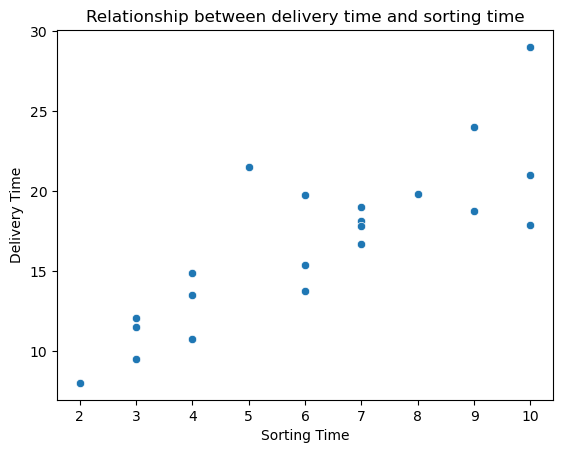

In [15]:
sns.scatterplot(x=df['Sorting Time'], y=df['Delivery Time'], data=df)
plt.title("Relationship between delivery time and sorting time")
plt.show()

- In this scatterplot, we visualize the relationship between a Sorting Time and Delivery Time.
- It shows a weak positive correlation between sorting time and delivery time.
- This means that there is a slight tendency for deliveries that take longer to sort to also take longer to deliver.
- However, the correlation is weak, and there are many exceptions to this trend.

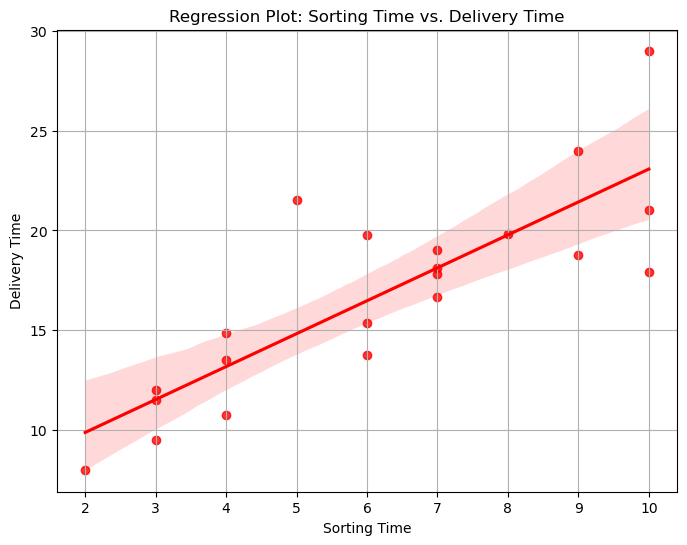

In [16]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Sorting Time', y='Delivery Time', color='red')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("Regression Plot: Sorting Time vs. Delivery Time")
plt.grid()
plt.show()

- The regression plot shows a positive linear relationship between sorting time and delivery time.
- This means that, on average, delivery times tend to increase as sorting times increase.
- The slope of the line indicates that for each additional unit of sorting time, there is an average increase of 1.33 units of delivery time.
- It is important to note that the data points are scattered around the line of best fit, and this indicates that there is variability in delivery times around the average.
- This means that some deliveries with longer sorting times may have shorter delivery times than deliveries with shorter sorting times, and vice versa.

In [17]:
correlation_matrix = df.corr()
print('Correlation :',correlation_matrix)

Correlation :                Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


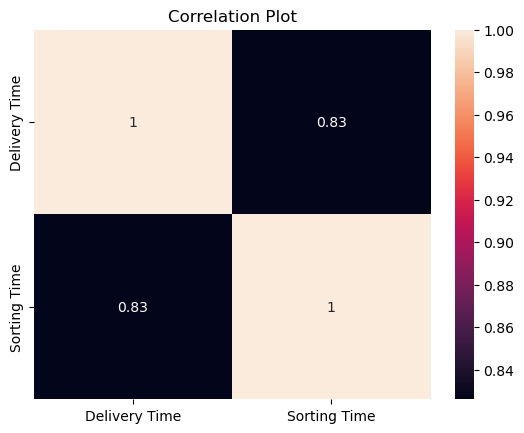

In [18]:
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Plot")
plt.show()

- The value in the cell where the row label is "Sorting Time" and the column label is "Delivery Time" is 0.33.
- This means that there is a weak positive correlation between sorting time and delivery time.
- This is consistent with the findings from the scatterplot.

# Splitting Data

In [19]:
from sklearn.model_selection import train_test_split

# Prepare the data for linear regression
X = df['Sorting Time']
y = df['Delivery Time']

# Reshaping array from 1d to 2d
X = X.values.reshape(-1,1)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [20]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the salary for the testing data
y_pred = model.predict(X_test)
print(y_test, y_pred)

0     21.00
17    18.11
15    14.88
1     13.50
8     17.90
Name: Delivery Time, dtype: float64 [24.9247435  18.85200984 12.77927618 12.77927618 24.9247435 ]


# Model Evaluation

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2.9025888966971176
Mean Squared Error (MSE): 14.046738956635016
Root Mean Squared Error (RMSE): 3.7478979383962705
R-squared (R2): -1.0207599586367362


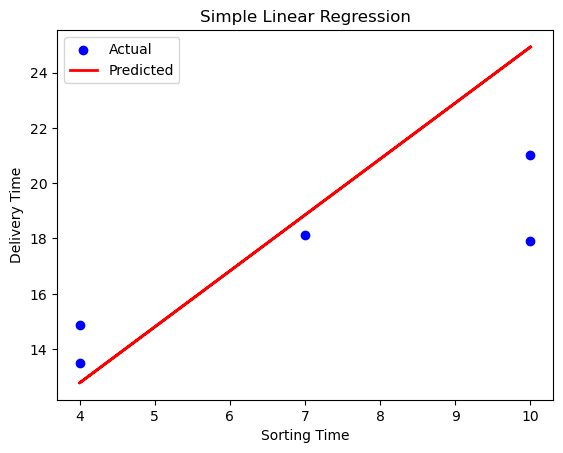

In [22]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.legend()
plt.title("Simple Linear Regression")
plt.show()

# Polynomial Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
polynomial_convertor = PolynomialFeatures(degree=2, include_bias=False)

In [25]:
polynomial_convertor.fit(X)

PolynomialFeatures(include_bias=False)

In [26]:
poly_features = polynomial_convertor.transform(X)

In [27]:
poly_features.shape

(21, 2)

In [28]:
poly_features[0]

array([ 10., 100.])

In [29]:
polynomial_convertor.fit_transform(X)

array([[ 10., 100.],
       [  4.,  16.],
       [  6.,  36.],
       [  9.,  81.],
       [ 10., 100.],
       [  6.,  36.],
       [  7.,  49.],
       [  3.,   9.],
       [ 10., 100.],
       [  9.,  81.],
       [  8.,  64.],
       [  4.,  16.],
       [  7.,  49.],
       [  3.,   9.],
       [  3.,   9.],
       [  4.,  16.],
       [  6.,  36.],
       [  7.,  49.],
       [  2.,   4.],
       [  7.,  49.],
       [  5.,  25.]])

In [30]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [31]:
poly_model = LinearRegression()

In [32]:
poly_model.fit(X_train, y_train)

LinearRegression()

In [33]:
test_predictions = poly_model.predict(X_test)

In [34]:
poly_model.coef_

array([1.69239725, 0.02396842])

# Model Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
# Calculate evaluation metrics
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)

MAE =  2.6504285783826247
MSE =  11.984070310741796
RMSE =  3.4618015989859665


In [37]:
train_rmse_error = []
test_rmse_error = []

for d in range(1,10):
    
    poly_convertor = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_convertor.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train,y_train)
    
    train_pred = poly_model.predict(X_train)
    test_pred = poly_model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

In [38]:
train_rmse_error

[2.7770666832487807,
 2.7740014211319646,
 2.2384893699768895,
 2.1090492390296416,
 2.011496675531447,
 1.6837870694779742,
 1.64822668055009,
 1.648226680549878,
 1.6482266805498331]

In [39]:
test_rmse_error

[3.351678551561038,
 3.4618015989859665,
 5.226181459667209,
 5.7228330198803965,
 5.678847281313172,
 7.655778311225201,
 9.409802430434713,
 8.54552730205947,
 7.800931074894923]

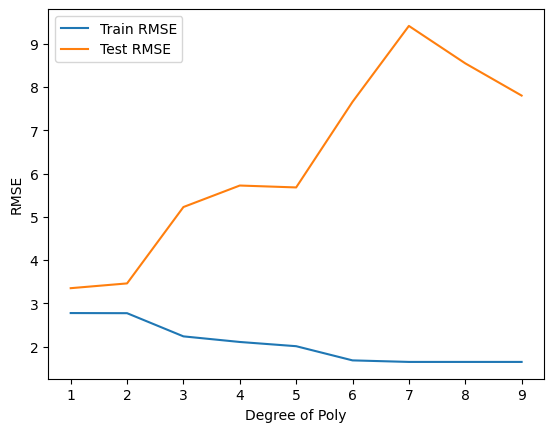

In [40]:
plt.plot(range(1,10),train_rmse_error, label='Train RMSE')

plt.plot(range(1,10),test_rmse_error, label='Test RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend();

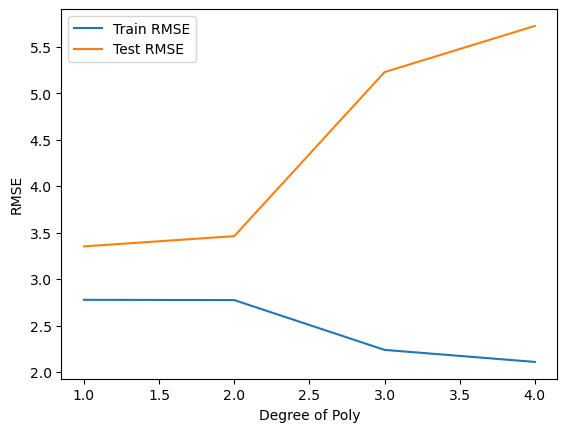

In [41]:
plt.plot(range(1,5),train_rmse_error[:4], label='Train RMSE')

plt.plot(range(1,5),test_rmse_error[:4], label='Test RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend();

- We can see sudden spike in error after 2, hence we keep 2 as polynimial degree and train our final model

In [42]:
final_poly_convertor = PolynomialFeatures(degree=2, include_bias=False)

In [43]:
final_model = LinearRegression()

In [44]:
full_converted_X = final_poly_convertor.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

# Model Deployment

In [45]:
# from joblib import dump,load

# dump(final_model, 'final_poly_model.joblib')